In [13]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from utils import regressao_linear
import pandas as pd
import numpy as np
import typing 
import math

# dados do tubo grande
dtg = pd.read_excel('tubo_grande.xlsx')
# dados do tubo pequeno
dtp = pd.read_excel('tubo_pequeno.xlsx')

In [14]:
tubo_grande_bounds = {'xlower': 0,
                      'xupper': 2500,
                      'ylower': 0 ,
                      'yupper': 90}

x_tubo_grande = dtg['Frequência (Hz)']
y_tubo_grande = dtg['Intensidade relativa (dB)']
print(type(x_tubo_grande))

<class 'pandas.core.series.Series'>


In [15]:
tubo_pequeno_bounds = {'xlower': 0,
                      'xupper': 1000,
                      'ylower': 0 ,
                      'yupper': 100}

x_tubo_pequeno = dtp['Frequência (Hz)']
y_tubo_pequeno = dtp['Intensidade relativa (dB)']
print(type(x_tubo_grande))

<class 'pandas.core.series.Series'>


In [16]:
valores_esperados = [
    172,
    344,
    516,
    688,
    860,
    1033,
    1205,
    1377,
    1549,
    1721,
    1893,
]

In [17]:
# def plot_tubes(data, x:str, y:str, bounds: dict):
#     ax = data.plot(x=x, y=y, figsize=(15,7.5))
#     ax.set_xbound(lower=bounds['xlower'], upper=bounds['xupper'])
#     ax.set_ybound(lower=bounds['ylower'], upper=bounds['yupper'])

def plot_tubes(x, y, size: int, bounds: dict, marker: str = '-'):
    # instanciar as classes figure e subplots
    fig = plt.figure()
    ax = fig.subplots()

    ax.plot(x, y, marker, linewidth=1)

    # condigurar o tamanho
    fig.set_figwidth(size)
    fig.set_figheight(size/2)

    # definir valores e mínimos para os eixos
    ax.set_xlim(2500)
    ax.set_xbound(lower=bounds['xlower'], upper=bounds['xupper'])
    ax.set_ybound(lower=bounds['ylower'], upper=bounds['yupper'])

    ax.set_ylabel('Intensidade relativa (dB)',fontsize=12)
    ax.set_xlabel('Frequência (Hz)',fontsize=12)
    ax.set_title('Intesidade Relativa por Frequência em Tubo aberto-aberto\n', fontsize=15)

    ax.vlines([valores_esperados], 0, 95, linestyles='dashed', color='red', alpha=0.60)

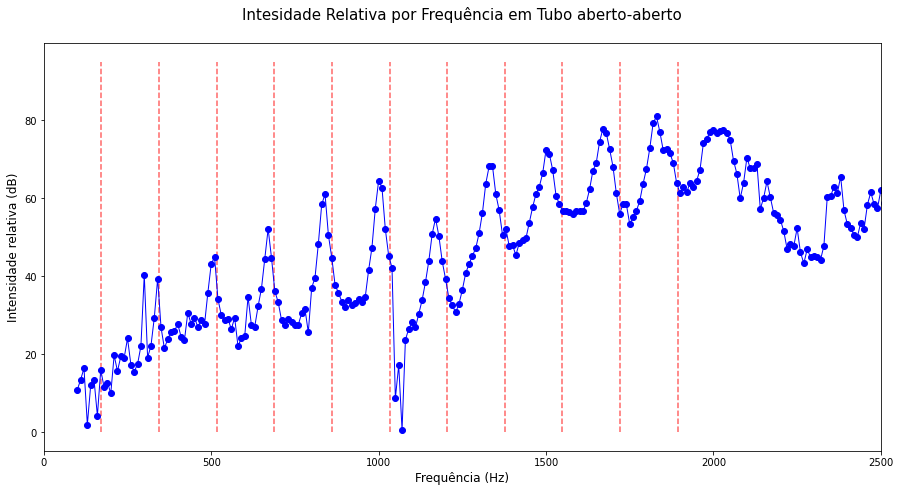

In [18]:
plot_tubes(x_tubo_grande, y_tubo_grande, size = 15, bounds=tubo_grande_bounds, marker = 'bo-')

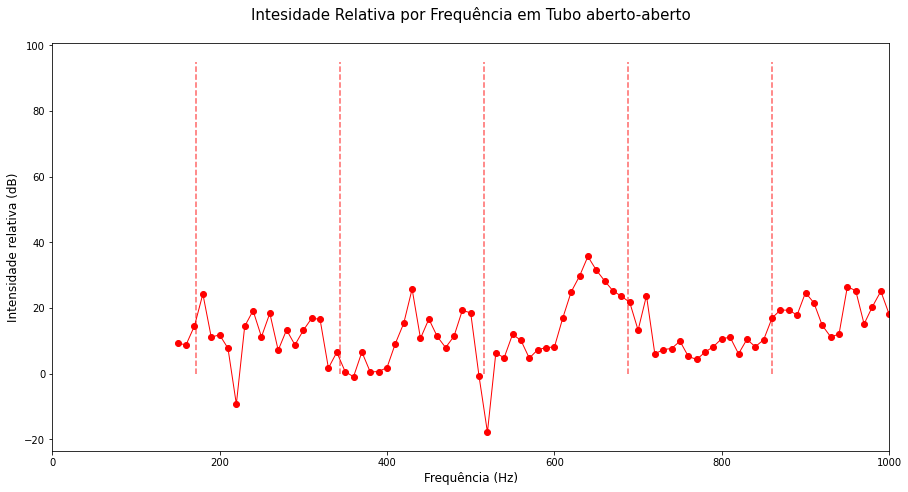

In [19]:
plot_tubes(x_tubo_pequeno, y_tubo_pequeno, size = 15, bounds=tubo_pequeno_bounds, marker = 'ro-')

In [20]:
series_tubo_grande = dtg['Intensidade relativa (dB)']

peaks_tubo_grande = find_peaks(series_tubo_grande, height=1, threshold=4.5)

height = peaks_tubo_grande[1]['peak_heights'] 
print(height)

[24.07155051 40.36476835 39.39686653 34.71130342 52.15934307 17.19887449
 52.29159883 56.47889766 63.17306409 65.84481722 63.60374627 70.00615248
 62.59147006 62.97544613]


<ipython-input-21-48dffcf90af8>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(x_tubo, y_exp_tubo_grande, yerr=10, color='black', fmt='k.', label='Medidas')


Text(0.5, 1.0, 'Intesidade Relativa por Frequência em Tubo aberto-aberto\n')

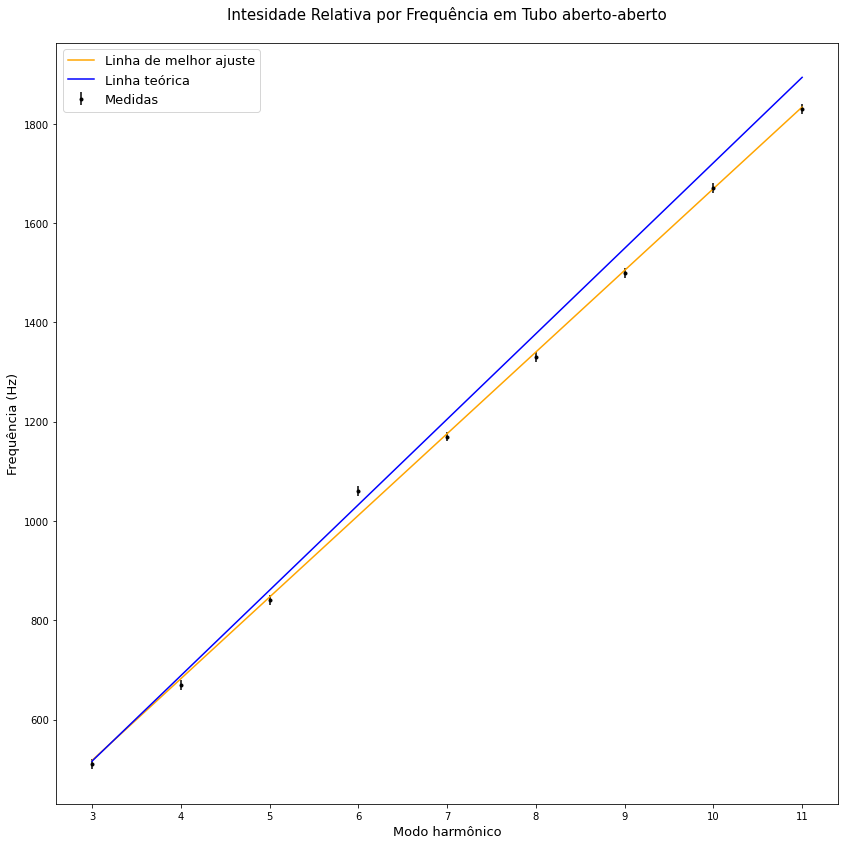

In [21]:
x_tubo = [3,4,5,6,7,8,9,10,11]
y_exp_tubo_grande = [510, 670, 840, 1060, 1170, 1330,  1500, 1670, 1830]
y_teorico_tubo_grande = [516, 688, 860, 1033, 1205, 1377, 1549, 1721, 1893]

fig, ax = plt.subplots(1, figsize=(14, 14))

ax.errorbar(x_tubo, y_exp_tubo_grande, yerr=10, color='black', fmt='k.', label='Medidas')
ax.plot(np.unique(x_tubo), np.poly1d(np.polyfit(x_tubo, y_exp_tubo_grande, 1))(np.unique(x_tubo)), color='orange', label='Linha de melhor ajuste')
ax.plot(np.unique(x_tubo), np.poly1d(np.polyfit(x_tubo, y_teorico_tubo_grande, 1))(np.unique(x_tubo)), color='blue', label='Linha teórica')

plt.legend(loc='best', fontsize=13)

ax.set_ylabel('Frequência (Hz)',fontsize=13)
ax.set_xlabel('Modo harmônico',fontsize=13)
ax.set_title('Intesidade Relativa por Frequência em Tubo aberto-aberto\n', fontsize=15)

In [26]:
a, b = regressao_linear(x_tubo, y_exp_tubo_grande, 8)
# print(a)
print('coeficiente angular corrigido', 'a =', a*(2*COMPRIMENTO_EFETIVO_TUBO_GRANDE))
print('coeficiente linear corrigido', 'b =', b*(2*COMPRIMENTO_EFETIVO_TUBO_GRANDE))

coeficiente angular corrigido a = 336.6+/-2.1
coeficiente linear corrigido b = 49+/-16


In [33]:
x_teorico_tubo_grande = [3,4,5,6,7,8,9,10,11]
y_teorico_tubo_grande = [516, 688, 860, 1033, 1205, 1377, 1549, 1721, 1893]
#plt.scatter(x_tubo,y_exp_tubo_grande, marker='o')

In [23]:
VELOCIDADE_DO_SOM_ESPERADA = 340.27 #(m/s)

# Oscilador (celular com phyphox)
FREQUENCIA_MINIMA_PHYPHOX = 10 #(Hz)
FREQUENCIA_MAXIMA_PHYPHOX = 10000 #(Hz)

# Experimento dos tubos
COMPRIMENTO_TUBO_PEQUENO = 0.225 #(m)
DIAMETRO_TUBO_PEQUENO = 0.037 #(m)
COMPRIMENTO_EFETIVO_TUBO_PEQUENO = COMPRIMENTO_TUBO_PEQUENO +  0.6*DIAMETRO_TUBO_PEQUENO #(m)
COMPRIMENTO_TUBO_GRANDE = 1.001 #(m)
DIAMETRO_TUBO_GRANDE = 0.037 #(m)
COMPRIMENTO_EFETIVO_TUBO_GRANDE = COMPRIMENTO_TUBO_GRANDE +  0.6*DIAMETRO_TUBO_GRANDE #(m)
GRADACAO_DO_MEDIDOR_DE_COMPRIMENTO = 0.001 #(m)

# Experimento do Ressoador de Helmholtz
COMPRIMENTO_GARGALO = 0.100 #(m)
DIAMETRO_GARGALO = 0.025 #(m)
COMPRIMENTO_EFETIVO_GARGALO = COMPRIMENTO_GARGALO +  1.45*(DIAMETRO_GARGALO/2) #(m)
VOLUME_DO_RESSOADOR = 0.000760 #(m**3)
GRADACAO_DO_MEDIDOR_DE_VOLUME = 0.000050 #(m**3)
RAIO_DO_GARGALO = DIAMETRO_GARGALO/2


Expected resonace: 119.54987447613318


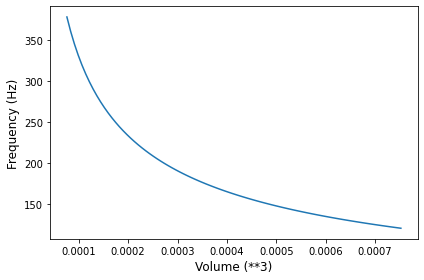

In [35]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 22 15:49:42 2020

@author: Christoph
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import lmfit


radius=DIAMETRO_GARGALO/2
length=COMPRIMENTO_EFETIVO_GARGALO
Volume=VOLUME_DO_RESSOADOR

print(f'Expected resonace: {(345*np.sqrt(np.pi*(radius)**2/((length+1.45*radius)*Volume)))/(2*np.pi)}')

s_vol=np.arange(Volume/10,Volume,Volume/100)      
sqrt_vol=np.sqrt(1/s_vol)
s_frequ=(345.44*np.sqrt(np.pi*(radius)**2/((length+1.45*radius)*s_vol)))/(2*np.pi)

fig,ax3 = plt.subplots(1,1)

ax3.plot(s_vol,s_frequ,label="Theory") 

ax3.set_xlabel('Volume (**3)',fontsize=12)
ax3.set_ylabel('Frequency (Hz)',fontsize=12)

plt.tight_layout()
plt.show()

ress760 = pd.read_excel('ressoador760.xlsx')
ress640 = pd.read_excel('ressoador640.xlsx')
ress520 = pd.read_excel('ressoador520.xlsx')
ress400 = pd.read_excel('ressoador400.xlsx')
ress280 = pd.read_excel('ressoador280.xlsx')
ress160 = pd.read_excel('ressoador160.xlsx')


peaks=[
    ress760,
    ress640,
    ress520,
    ress400,
    ress280,
    ress160,
]

peak_names =[
    'Volume = 760 mL',
    'Volume = 640 mL',
    'Volume = 520 mL',
    'Volume = 400 mL',
    'Volume = 280 mL',
    'Volume = 160 mL',
]

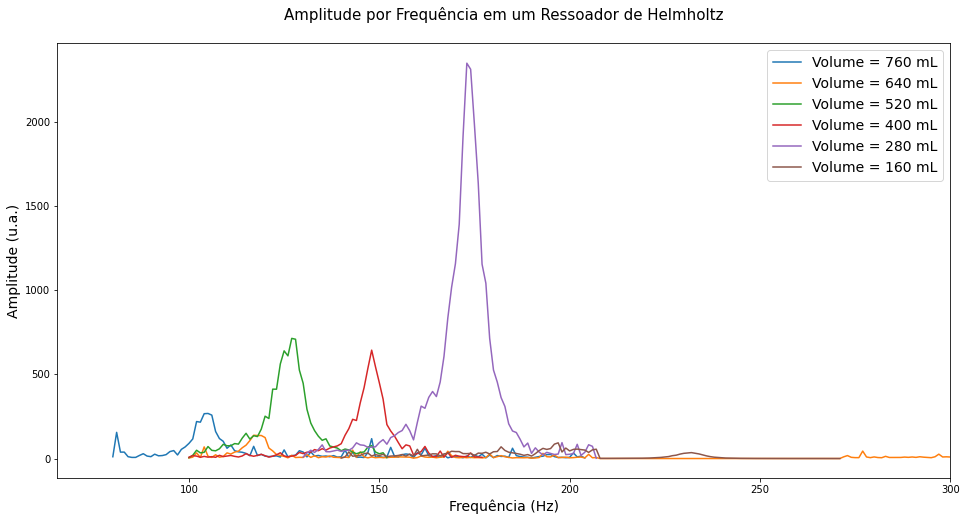

In [36]:
# instanciar as classes figure e subplots
fig = plt.figure()
ax = fig.subplots()
ax.plot(ress760['frequency (Hz)'], ress760['relative amplitude (a.u.)'], label='Volume = 760 mL')
ax.plot(ress640['frequency (Hz)'], ress640['relative amplitude (a.u.)'], label='Volume = 640 mL')
ax.plot(ress520['frequency (Hz)'], ress520['relative amplitude (a.u.)'], label='Volume = 520 mL')
ax.plot(ress400['frequency (Hz)'], ress400['relative amplitude (a.u.)'], label='Volume = 400 mL')
ax.plot(ress280['frequency (Hz)'], ress280['relative amplitude (a.u.)'], label='Volume = 280 mL')
ax.plot(ress160['frequency (Hz)'], ress160['relative amplitude (a.u.)'], label='Volume = 160 mL')

plt.legend(loc='best', fontsize=14)
#handles, labels = plt.gca().get_legend_handles_labels()

ax.set_xbound(upper=300)

ax.set_ylabel('Amplitude (u.a.)',fontsize=14)
ax.set_xlabel('Frequência (Hz)',fontsize=14)
ax.set_title('Amplitude por Frequência em um Ressoador de Helmholtz\n', fontsize=15)

fig.set_figwidth(16)
fig.set_figheight(8)


Amplitude 27.75, Center 104.44, FWHM 6.71
Amplitude 12.63, Center 117.97, FWHM 5.61
Amplitude 85.25, Center 126.09, FWHM 7.49
Amplitude 54.15, Center 147.83, FWHM 6.16
Amplitude 249.63, Center 173.96, FWHM 7.18
Amplitude 427.91, Center 231.54, FWHM 7.46


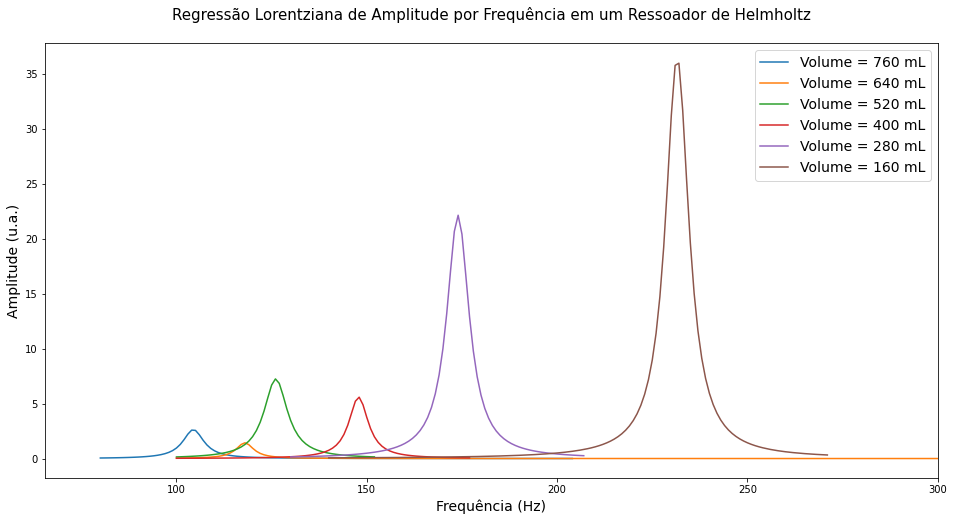

In [37]:
#
#Plot the peaks
#

fig,ax2 = plt.subplots(1,1)

fig.set_figwidth(16)
fig.set_figheight(8)

# for peak in peaks:
#     ax2.plot(peak['frequency (Hz)'],peak['audio amplitude (a.u.)']) 

ax2.set_ylabel('Amplitude (u.a.)',fontsize=14)
ax2.set_xlabel('Frequência (Hz)',fontsize=14)
ax2.set_title('Regressão Lorentziana de Amplitude por Frequência em um Ressoador de Helmholtz\n', fontsize=15)


#ax2.legend(fontsize='small')



#
#Find the peak position by fitting a Lorentzian curve
#

model=lmfit.models.LorentzianModel()
#cen = [114,2872,3448,3751,4427,4861] 
pos=[]
err_pos=[]

i = 0 # gambiarra feia
for peak in peaks:

    param=model.guess(peak['audio amplitude (a.u.)'],x=peak['frequency (Hz)'])
    result=model.fit(peak['audio amplitude (a.u.)'],x=peak['frequency (Hz)'],params=param)
    
    #print(result.fit_report())
    #print(result.best_values)
    
    print(f'Amplitude {result.best_values["amplitude"]:.2f}, Center {result.best_values["center"]:.2f}, FWHM {2*result.best_values["sigma"]:.2f}')
    ax2.plot(peak['frequency (Hz)'],result.best_fit, label=peak_names[i], )
    ax2.legend(loc='best', fontsize=14)
    pos.append(result.best_values["center"])
    err_pos.append(result.params['center'].stderr)
    i+=1

ax2.set_xbound(upper=300)

<ipython-input-38-cba692a01f43>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(x_ress, y_ress, yerr=7, color='black', fmt='k.', label='Medidas')


Text(0.5, 1.0, 'Frequências fundamentais por Volume de um Ressoador de Helmholtz\n')

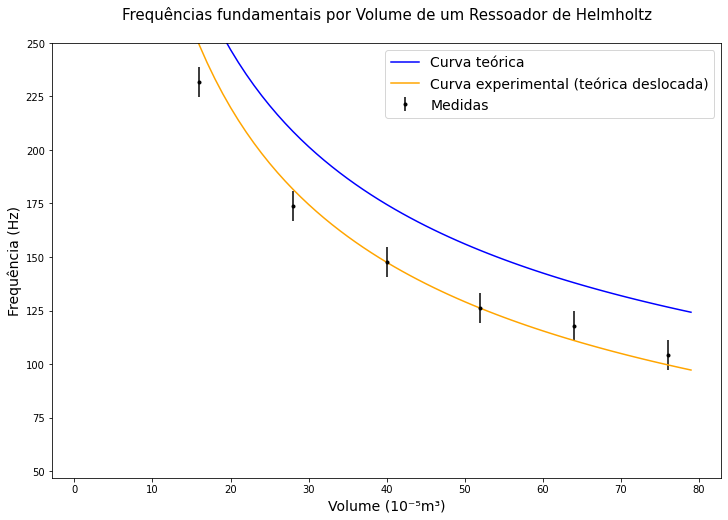

In [38]:
x_ress = [16,28,40,52,64,76]
y_ress = [
    231.54,
    173.97,
    147.83, 
    126.09, 
    117.97,
    104.44,
]

y_ress_teo = [
    276,
    208,
    174,
    153,
    138,
    127,
]

x_linha = np.arange(1,80) # frequência
y_linha = (VELOCIDADE_DO_SOM_ESPERADA*(DIAMETRO_GARGALO/2)*np.sqrt(np.pi/(COMPRIMENTO_EFETIVO_GARGALO*(x_linha*10**(-5)))))/(2*np.pi)
y_shifted = (VELOCIDADE_DO_SOM_ESPERADA*(DIAMETRO_GARGALO/2)*np.sqrt(np.pi/(COMPRIMENTO_EFETIVO_GARGALO*(x_linha*10**(-5)))))/(2*np.pi) - 27

fig1, ax1 = plt.subplots(1, figsize=(14, 14))

ax1.errorbar(x_ress, y_ress, yerr=7, color='black', fmt='k.', label='Medidas')
ax1.plot(x_linha, y_linha, color='blue', label='Curva teórica')
ax1.plot(x_linha, y_shifted, color='orange', label='Curva experimental (teórica deslocada)')
#ax1.plot(x_ress, y_ress, color='orange', label='Curva experimental')


fig1.set_figwidth(12)
fig1.set_figheight(8)

plt.legend(loc='best', fontsize=14)

#ax.set_xbound(lower=bounds['xlower'], upper=bounds['xupper'])
ax1.set_ybound(upper=250)

ax1.set_xlabel('Volume (10⁻⁵m³)',fontsize=14)
ax1.set_ylabel('Frequência (Hz)',fontsize=14)
ax1.set_title('Frequências fundamentais por Volume de um Ressoador de Helmholtz\n', fontsize=15)

[79.0569415  59.76143047 50.         43.85290097 39.52847075 36.27381251]
<ipython-input-39-c5a82a0a60bd>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax2.errorbar(x_lin, y_ress, yerr=7, color='black', fmt='k.', label='Medidas')


Text(0.5, 1.0, 'Linearização de Frequências fundamentais por Volume de um Ressoador de Helmholtz\n')

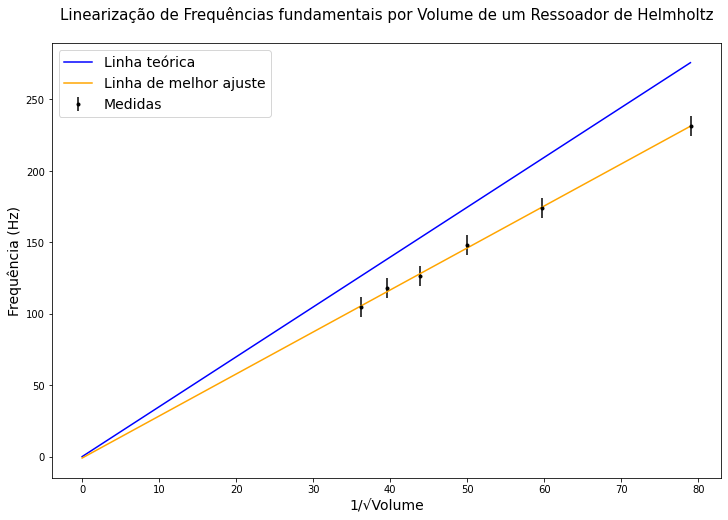

In [39]:

y_ress = [
    231.54,
    173.97,
    147.83, 
    126.09, 
    117.97,
    104.44,
]

x_ress = [
   0.00016,
    0.00028,
    0.00040,
    0.00052,
    0.00064,
    0.00076,
]

x_teo = np.arange(0,80)
y_teo = x_teo * 3.49

#y_teo = x_teo*((VELOCIDADE_DO_SOM_ESPERADA*RAIO_DO_GARGALO*math.sqrt(math.pi/COMPRIMENTO_EFETIVO_GARGALO))/2*math.pi)
# y_teo = x_teo(((VELOCIDADE_DO_SOM_ESPERADA*RAIO_DO_GARGALO)/(2*math.pi))*math.sqrt(math.pi/COMPRIMENTO_EFETIVO_GARGALO))
x_lin = np.array(x_ress) ** (-0.5)
print(x_lin)

fig2, ax2 = plt.subplots()

ax2.errorbar(x_lin, y_ress, yerr=7, color='black', fmt='k.', label='Medidas')
ax2.plot(x_teo, y_teo, color='blue', label='Linha teórica')
# ax2.plot(np.unique(x_lin), np.poly1d(np.polyfit(x_lin, y_ress, 1))(np.unique(x_lin)), color='orange', label='Linha de melhor ajuste')

y_lin = x_teo*2.94 - 1

ax2.plot(x_teo, y_lin, color='orange', label='Linha de melhor ajuste')

# ax1.plot(x_linha, y_shifted, color='orange', label='Curva experimental (teórica deslocada)')
# ax1.plot(x_ress, y_ress, color='orange', label='Curva experimental')


fig2.set_figwidth(12)
fig2.set_figheight(8)

plt.legend(loc='best', fontsize=14)

#ax.set_xbound(lower=bounds['xlower'], upper=bounds['xupper'])
# ax2.set_ybound(upper=500, lower=0)

ax2.set_xlabel('1/√Volume',fontsize=14)
ax2.set_ylabel('Frequência (Hz)',fontsize=14)
ax2.set_title('Linearização de Frequências fundamentais por Volume de um Ressoador de Helmholtz\n', fontsize=15)

In [40]:
a, b = regressao_linear(x_lin, y_ress, yerror=7)

print('coeficiente angular: ', a)
print('coeficiente linear: ', b)

coeficiente angular:  2.94+/-0.20
coeficiente linear:  -1+/-11


In [41]:
d = ((DIAMETRO_GARGALO/2)*math.sqrt(math.pi*COMPRIMENTO_EFETIVO_GARGALO))/(2*math.pi)
print(d)

0.0012119256904280652


In [42]:
print(a/d)

(2.42+/-0.16)e+03


In [43]:
print(COMPRIMENTO_EFETIVO_GARGALO)

0.11812500000000001


In [44]:
# fig ,axes = plt.subplots(1,2)
# 
# x = np.arange(100, 10000)
# y0 = VELOCIDADE_DO_SOM_ESPERADA/(2*COMPRIMENTO_EFETIVO_TUBO_GRANDE) # aberto-aberto
# y1 = VELOCIDADE_DO_SOM_ESPERADA/(4*COMPRIMENTO_EFETIVO_TUBO_GRANDE) # aberto-fechado
# 
# axes[0].plot(x, y0)
# axes[1].plot(x, y1)
